In [1]:
# initialise and load WB annotations
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
df_hmm_ee = pd.read_csv('wget/compbio.med.harvard.edu/modencode/webpage/hihmm/iHMM.M1K16.worm_EE.bed', sep='\t', names=yp.NAMES_BED9)
df_hmm_l3 = pd.read_csv('wget/compbio.med.harvard.edu/modencode/webpage/hihmm/iHMM.M1K16.worm_L3.bed', sep='\t', names=yp.NAMES_BED9)
df_hmm_ee['chrom'] = list(map(lambda chr: 'chr' + chr, df_hmm_ee['chrom']))
df_hmm_l3['chrom'] = list(map(lambda chr: 'chr' + chr, df_hmm_l3['chrom']))

In [3]:
df_hmm_ee['strand'] = '.'
df_hmm_l3['strand'] = '.'

In [4]:
fp_ = 'annot/FigB_chromatin_states/Ho2014_EE.bed'
df_hmm_ee.to_csv(fp_, header=False, index=False, sep='\t')
fp_ = 'annot/FigB_chromatin_states/Ho2014_L3.bed'
df_hmm_l3.to_csv(fp_, header=False, index=False, sep='\t')

In [4]:
l_hmm_label = [
 '1_Pro',
 '2_Enh1',
 '3_Enh2',
 '4_Egn1',
 '5_Egn2',
 '6_Egn3',
 '7_Egn4',
 '8_Egn5',
 '9_Egn6',
 '10_Rep1',
 '11_Rep2',
 '12_Het1',
 '13_Het2',
 '14_Low1',
 '15_Low2',
 '16_Low3',
 #'17_Unmap', # No accessible sites within unmapped sequence (not unreasonable)
]

df_regl = regl_addons()
df_mode = regl_mode()

df_regl['hmm_ee'] = BedTool.from_dataframe(df_mode).map(
    b=BedTool.from_dataframe(df_hmm_ee[yp.NAMES_BED9[:4]]),
    c=4, o='distinct',
).to_dataframe()['name']

df_regl['hmm_l3'] = BedTool.from_dataframe(df_mode).map(
    b=BedTool.from_dataframe(df_hmm_l3[yp.NAMES_BED9[:4]]),
    c=4, o='distinct',
).to_dataframe()['name']

7076 non-promoters outside of outron/gene body (=no gene_id)


/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


13195 of 42245 sites with CV values via promoter annotation
32525 of 42245 sites with CV values via "associated gene"


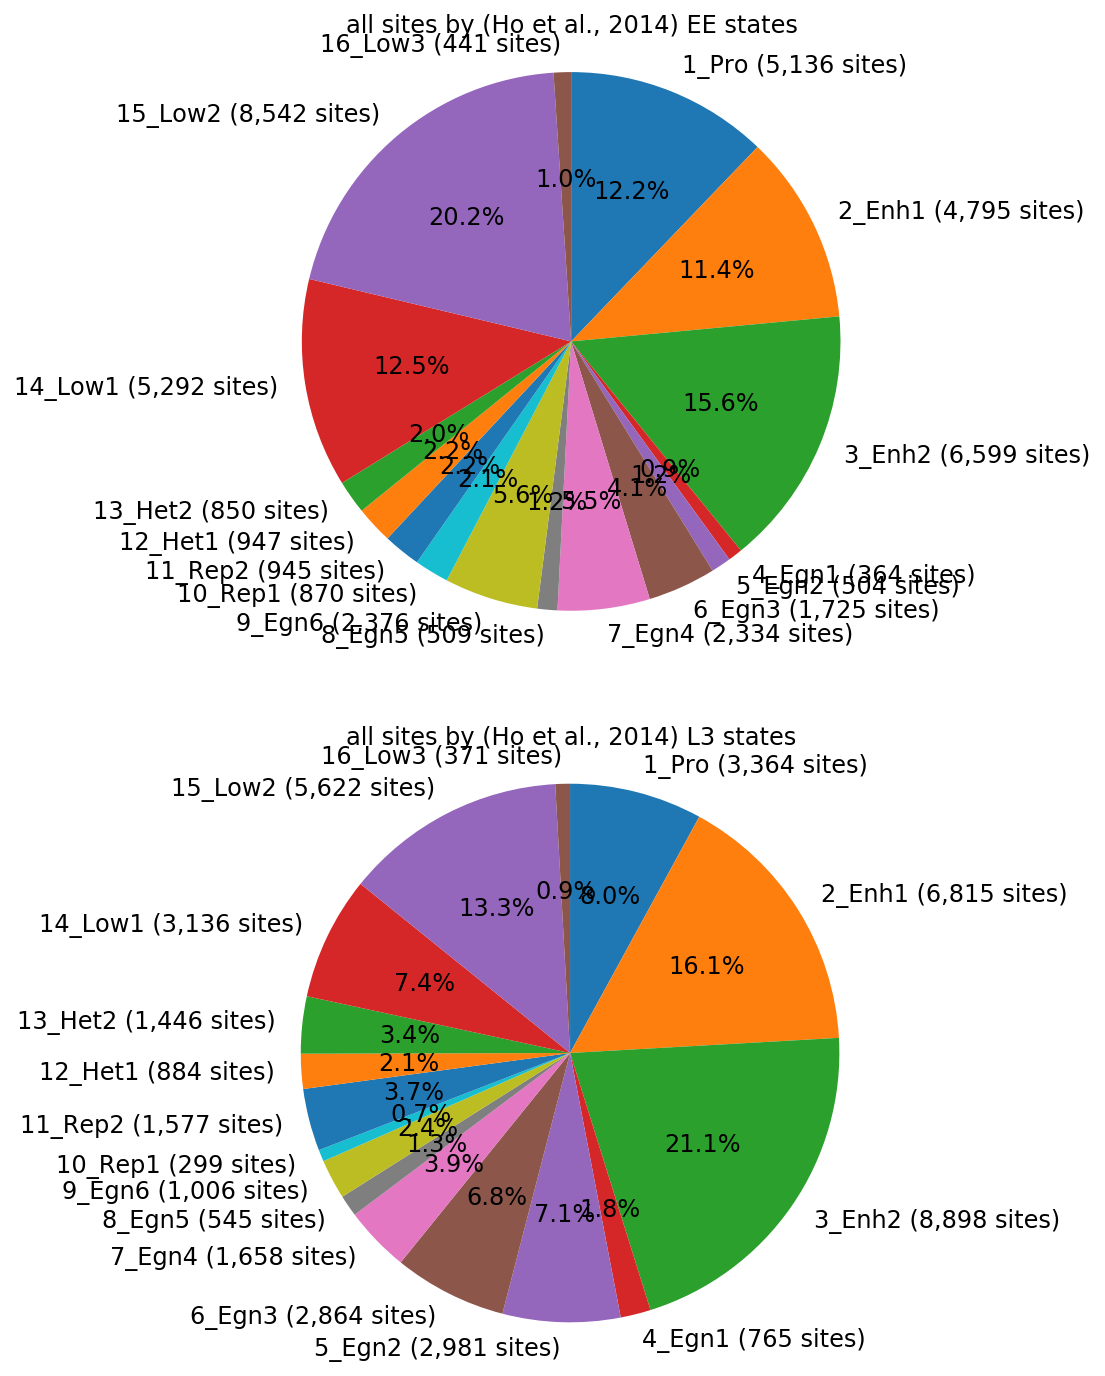

In [5]:
def pie_(x, labels, sep='\n', **kwargs):
    labels_annot = ['%s%s(%s sites)' % (l_, sep, yp.f_uk(x_)) for l_, x_ in zip(labels, x)]
    df_ = pd.Series(x, index=labels_annot)
    df_.plot(kind='pie', **kwargs)

plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
vc_ = df_regl['hmm_ee'].value_counts().loc[l_hmm_label]
pie_(
    vc_.values,
    vc_.index.tolist(),
    label='',
    autopct='%.1f%%',
    sep=' ',
    title='all sites by (Ho et al., 2014) EE states',
    startangle=90,
    fontsize=12,
    counterclock=False,
)
plt.axis('equal');

plt.subplot(2,1,2)
vc_ = df_regl['hmm_l3'].value_counts().loc[l_hmm_label]
pie_(
    vc_.values,
    vc_.index.tolist(),
    label='',
    autopct='%.1f%%',
    sep=' ',
    title='all sites by (Ho et al., 2014) L3 states',
    startangle=90,
    fontsize=12,
    counterclock=False,
)
plt.axis('equal');

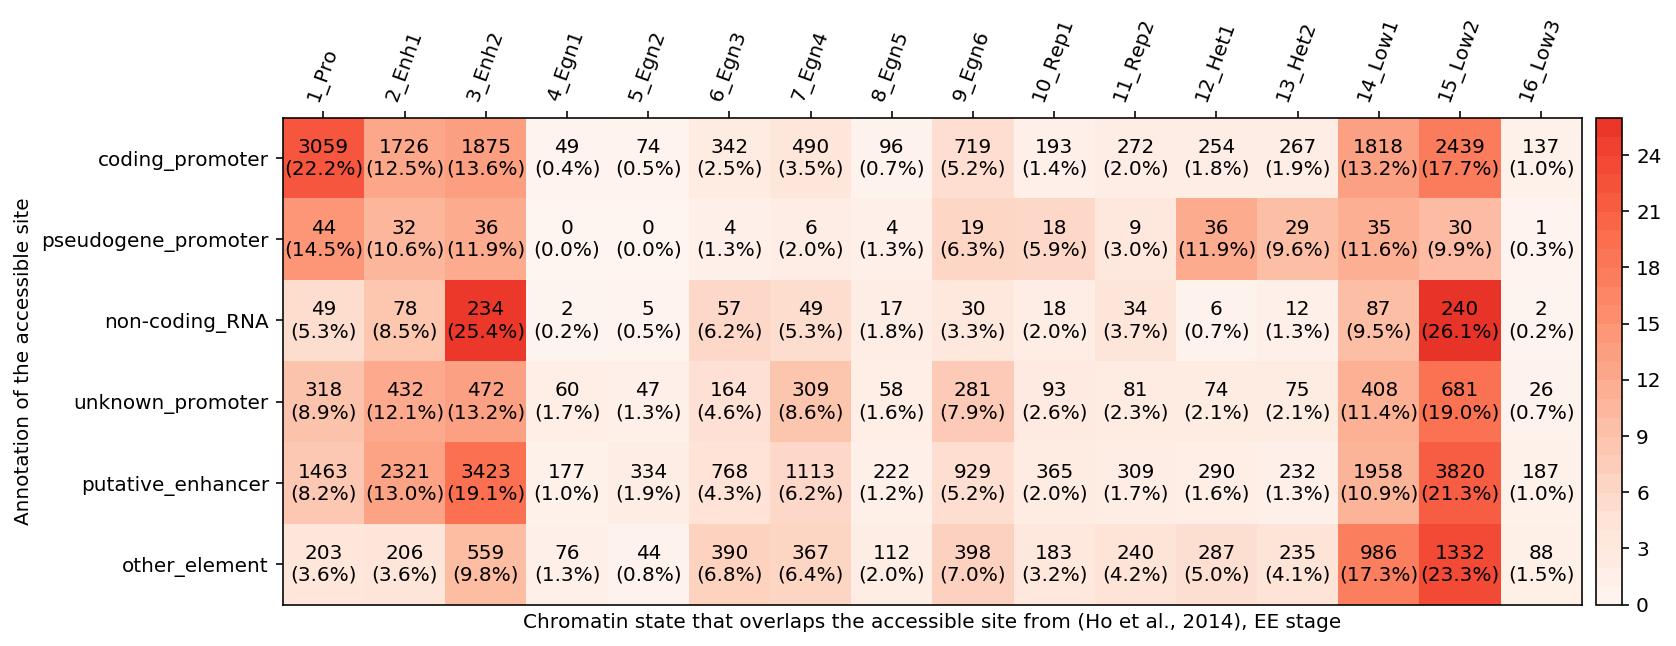

In [13]:
ct_ = pd.crosstab(
    pd.Categorical(df_regl['annot']), 
    pd.Categorical(df_regl['hmm_ee'])
).loc[config['annot'], l_hmm_label]
fig = plt.figure(figsize=(12, 6))
plt.gca().set_xlabel('Chromatin state that overlaps the accessible site from (Ho et al., 2014), EE stage')
plt.gca().set_ylabel('Annotation of the accessible site')
#yp.imshow_enr(ct_, vmin=-1, vmax=+1)
yp.imshow_rpc(ct_, cmap='Reds', vmin=0, vmax=+40, rotation=70, boundaries=np.linspace(0, 26, 27, endpoint=True))
plt.savefig('annot/FigB_chromatin_states/annot_vs_Ho2014_EE.png', bbox_inches='tight')

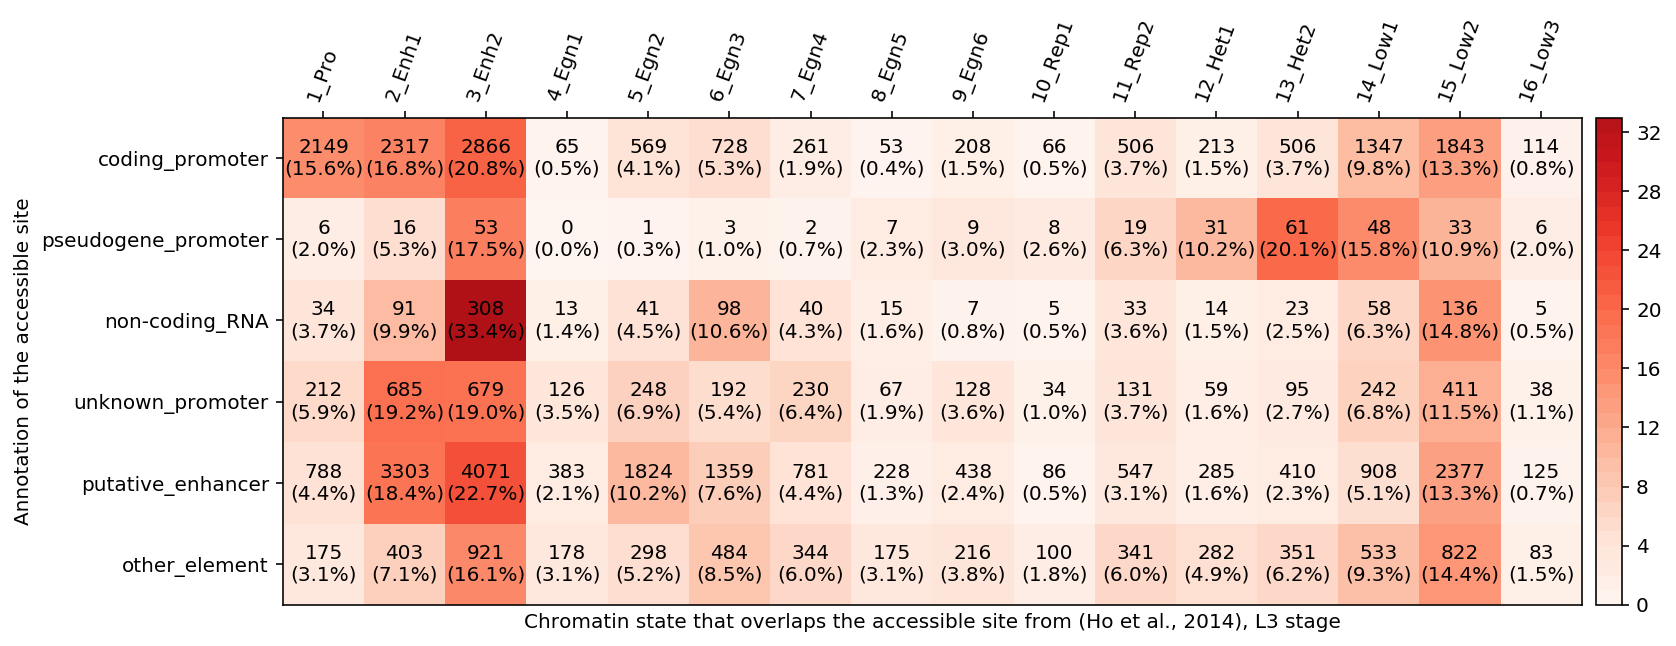

In [14]:
ct_ = pd.crosstab(
    pd.Categorical(df_regl['annot']), 
    pd.Categorical(df_regl['hmm_l3'])
).loc[config['annot'], l_hmm_label]
fig = plt.figure(figsize=(12, 6))
plt.gca().set_xlabel('Chromatin state that overlaps the accessible site from (Ho et al., 2014), L3 stage')
plt.gca().set_ylabel('Annotation of the accessible site')
#yp.imshow_enr(ct_, vmin=-1, vmax=+1)
yp.imshow_rpc(ct_, cmap='Reds', vmin=0, vmax=+40, rotation=70, boundaries=np.linspace(0, 33, 34, endpoint=True))
plt.savefig('annot/FigB_chromatin_states/annot_vs_Ho2014_L3.png', bbox_inches='tight')